In [21]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

np.random.seed(42)

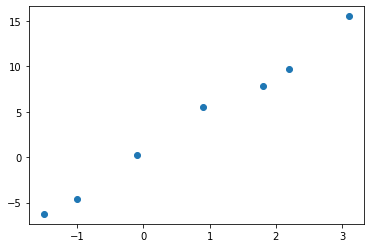

In [22]:
w = 4.5
b = 7.0

x_array = np.array([-1.5, -1.0, -0.1, 0.9, 1.8, 2.2, 3.1])
y_array = w * x_array + np.random.normal(size=x_array.shape[0])
plt.scatter(x_array, y_array)

In [23]:
x = torch.tensor([4.], requires_grad=True)
f = x ** 3
g = torch.autograd.grad(f, x, create_graph=True)
print(g)

g[0].backward()
x.grad

(tensor([48.], grad_fn=<MulBackward0>),)


tensor([24.])

In [24]:
x = torch.tensor([4.], requires_grad=True)
y = torch.tensor([3.], requires_grad=True)
f = (x + 2 * y) ** 3
g = torch.autograd.grad(f, x, create_graph=True)
print(g)
g[0].backward()
print(x.grad)
print(y.grad)

(tensor([300.], grad_fn=<MulBackward0>),)
tensor([60.])
tensor([120.])


In [25]:
t = torch.tensor([4.0], requires_grad=True)
x = torch.tensor([3.0], requires_grad=True)
#print('*start*t*x*'*3)
#print(torch.cat([t, x], dim=0))
print(torch.cat([t, x], dim=0).size())
print(torch.tensor([[2.0, 1.0]]).size())
#u = torch.cat([t, x], dim=0) * torch.tensor([[2.0],
#                                             [1.0]])
u = torch.mv(torch.tensor([[2.0, 1.0]]), torch.cat([t, x], dim=0))
#print('*model*'*10)
u.backward()
print(u)
#gradient = torch.autograd.grad(u, (t, x), retain_graph=True, create_graph=True)
#print(gradient)
print(t.grad)
print(x.grad)

torch.Size([2])
torch.Size([1, 2])
tensor([11.], grad_fn=<MvBackward>)
tensor([2.])
tensor([1.])


In [89]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        '''
        x = torch([batch, t, x])
        '''
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [90]:
model = Model()
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.6428, -0.3833],
        [ 0.6757,  0.6876]], requires_grad=True)
Parameter containing:
tensor([-0.2276, -0.5700], requires_grad=True)
Parameter containing:
tensor([[-0.2379, -0.0359]], requires_grad=True)
Parameter containing:
tensor([0.3716], requires_grad=True)


In [91]:
t = torch.tensor([4.0], requires_grad=True)
x = torch.tensor([3.0], requires_grad=True)

In [92]:
u = model(torch.cat([t, x], dim=0))

In [93]:
print(model.state_dict().keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


In [94]:
print(u)

tensor([0.1378], grad_fn=<AddBackward0>)


In [95]:
gradient = torch.autograd.grad(u, (t, x), retain_graph=True, create_graph=True)

In [96]:
print(gradient)

(tensor([-0.0472], grad_fn=<SliceBackward>), tensor([0.0281], grad_fn=<SliceBackward>))


In [97]:
t = torch.tensor([5.0], requires_grad=True)
x = torch.tensor([4.0], requires_grad=True)
u = model(torch.cat([t, x], dim=0))
print(u)
gradient = torch.autograd.grad(u, (t, x), retain_graph=True, create_graph=True)

tensor([0.1224], grad_fn=<AddBackward0>)


In [98]:
print(gradient)

(tensor([-0.0301], grad_fn=<SliceBackward>), tensor([0.0179], grad_fn=<SliceBackward>))


In [99]:
t = torch.tensor([5.0], requires_grad=True)
x = torch.tensor([4.0], requires_grad=True)
u = model(torch.cat([t, x], dim=0))
print(u)
u.backward()
print(x.grad)
print(t.grad)

tensor([0.1224], grad_fn=<AddBackward0>)
tensor([0.0179])
tensor([-0.0301])
